In [9]:
import numpy as np
import numpy.linalg as nlg
import scipy as sc
from scipy.spatial import cKDTree
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from timeit import default_timer as timer
import cmath as cm

In [14]:
def routine_diag(H):
    eigv = nlg.eigvals(H)
    return eigv

n = 10000
H0 = np.random.normal(0, 1/np.sqrt(2), (n,n))
ev = routine_diag(H0)

def CSR(eigv):
    grd = []
    kdt_eigv = np.stack([np.real(eigv), np.imag(eigv)], axis=-1)
    kdt = cKDTree(kdt_eigv)
    for j in range(n):
        dists, indices = kdt.query(kdt_eigv[j], 3)
        nns = eigv[indices]
        grd.append((nns[1] - eigv[j]) / (nns[2] - eigv[j]))
    return grd

Csprat = CSR(ev)

  0%|          | 0/10000 [00:00<?, ?it/s]

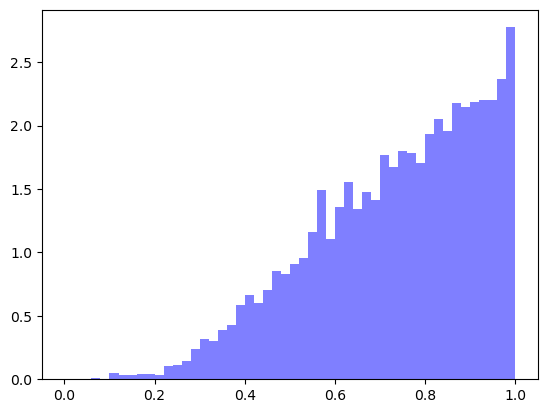

In [15]:
plt.hist(np.abs(Csprat),range = [0,1],  bins=50, density=True, alpha=0.5, color='blue')
plt.show()

In [18]:
##############Complex spacing ratios of Ginibre matrices###################
start = timer()
def routine_diag(H):
    eigv = nlg.eigvals(H)
    return eigv

def CSR(eigv):
    grd = []
    kdt_eigv = np.stack([np.real(eigv), np.imag(eigv)], axis=-1)
    kdt = cKDTree(kdt_eigv)
    for j in range(n):
        dists, indices = kdt.query(kdt_eigv[j], 3)
        nns = eigv[indices]
        grd.append((nns[1] - eigv[j]) / (nns[2] - eigv[j]))
    return grd

def CSR_GinOE(n,ens):
    evt = []
    grdt = []
    for i in tqdm(range(ens)):
        H0 = np.random.normal(0, 1/np.sqrt(2), (n,n))
        # Ginibre matrices with real random gaussian entries with mean = 0, std.dev = 1/sqrt(2)
        #H1 = np.random.normal(0, 1/np.sqrt(2), (n,n)) + 1j * np.random.normal(0, 1/np.sqrt(2), (n,n))
        # Ginibre matrices with real complex gaussian entries with mean = 0, std.dev = 1/sqrt(2)
        ev = routine_diag(H0)
        evt.extend(ev)
        csrg = CSR(ev)
        grdt.append(csrg)
    return evt,grdt

n = 500
ens = 1000

eigv,CSR = CSR_GinOE(n,ens)


end = timer()
print(end - start)

  0%|          | 0/1000 [00:00<?, ?it/s]

186.39593140000034


In [19]:
e2 = np.array(CSR).flatten()

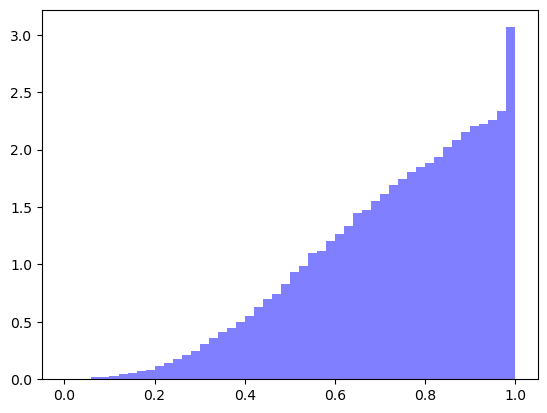

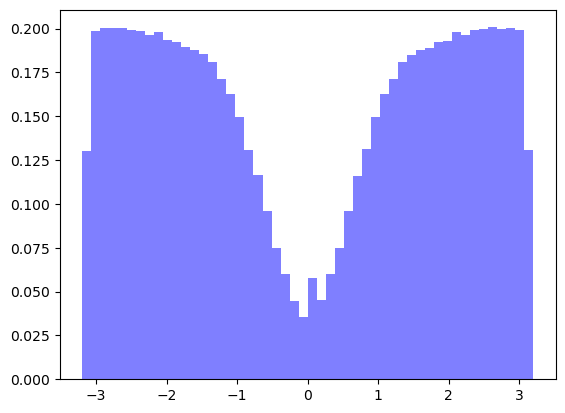

In [20]:
#############The radial marginal distribution for the CSR (p(r) vs r)########################
plt.hist(np.abs(e2),range = [0,1],  bins=50, density=True, alpha=0.5, color='blue')
plt.show()
##############The angular marginal distribution for the CSR (p(theta) vs theta)#####################
plt.hist(np.angle(e2),range = [-3.2,3.2],  bins=50, density=True, alpha=0.5, color='blue')
plt.show()

In [21]:
##############Complex spacing ratios of Ginibre matrices###################
start = timer()
def complex_spacing_ratios(n,ens):
    evt = []
    grdt = []
    for i in tqdm(range(ens)):
        H0 = np.random.normal(0, 1/np.sqrt(2), (n,n))
        # Ginibre matrices with real random gaussian entries with mean = 0, std.dev = 1/sqrt(2)
        #H1 = np.random.normal(0, 1/np.sqrt(2), (n,n)) + 1j * np.random.normal(0, 1/np.sqrt(2), (n,n))
        # Ginibre matrices with real complex gaussian entries with mean = 0, std.dev = 1/sqrt(2)
        eigv = nlg.eigvals(H0)
        evt.extend(eigv)
        grd = []
        kdt_eigv = np.stack([np.real(eigv), np.imag(eigv)], axis=-1)
        kdt = cKDTree(kdt_eigv)
        for j in range(n):
            dists, indices = kdt.query(kdt_eigv[j], 3)
            nns = eigv[indices]
            grd.append((nns[1] - eigv[j]) / (nns[2] - eigv[j]))
        grdt.append(grd)
    return evt,grdt

n = 500
ens = 1000

eigv,CSR = complex_spacing_ratios(n,ens)


end = timer()
print(end - start)

  0%|          | 0/1000 [00:00<?, ?it/s]

188.85628520000046


In [22]:
e1 = np.array(eigv).flatten()
e2 = np.array(CSR).flatten()

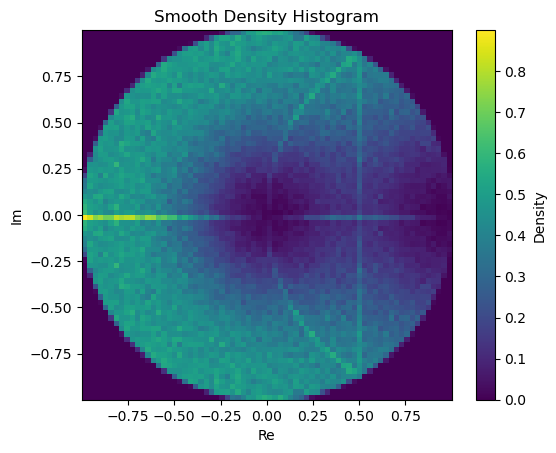

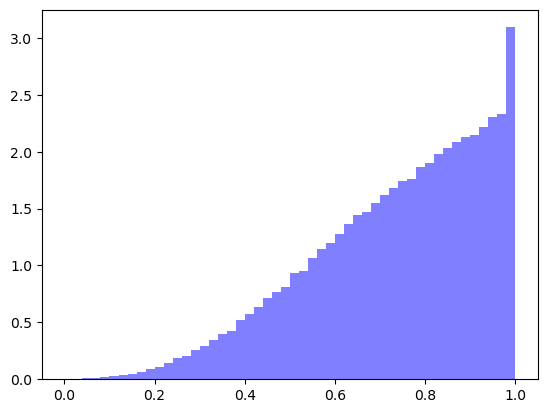

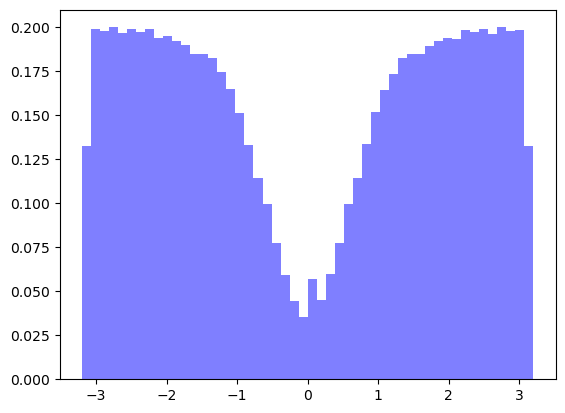

In [23]:
########### the heat map complex list plot for the complex spacing ratios######################
# Example data, replace this with your data
x = np.real(e2)
y = np.imag(e2)
# Calculate 2D histogram
heatmap, xedges, yedges = np.histogram2d(x, y, bins=70, density=True)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

# Plot smooth density histogram
plt.imshow(heatmap.T, extent=extent, origin='lower', cmap='viridis')
plt.colorbar(label='Density')
plt.xlabel('Re')
plt.ylabel('Im')
plt.title('Smooth Density Histogram')
plt.show()
#############The radial marginal distribution for the CSR (p(r) vs r)########################
plt.hist(np.abs(e2),range = [0,1],  bins=50, density=True, alpha=0.5, color='blue')
plt.show()
##############The angular marginal distribution for the CSR (p(theta) vs theta)#####################
plt.hist(np.angle(e2),range = [-3.2,3.2],  bins=50, density=True, alpha=0.5, color='blue')
plt.show()

In [5]:
e2 = np.array(CSR).flatten()
###There maybe more straight forward ways to flatten the list and plot

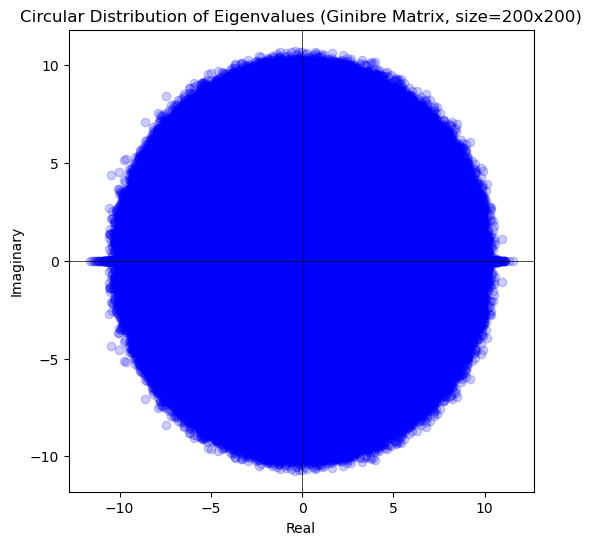

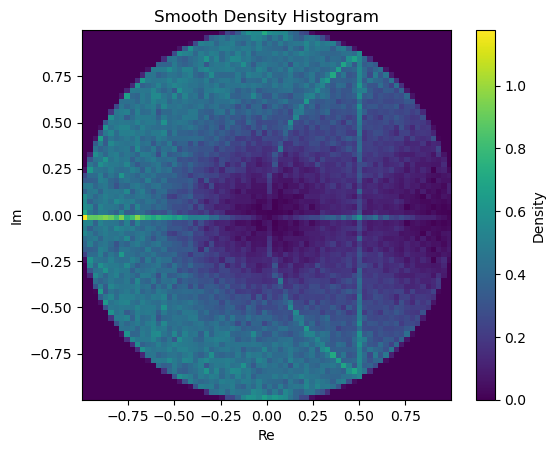

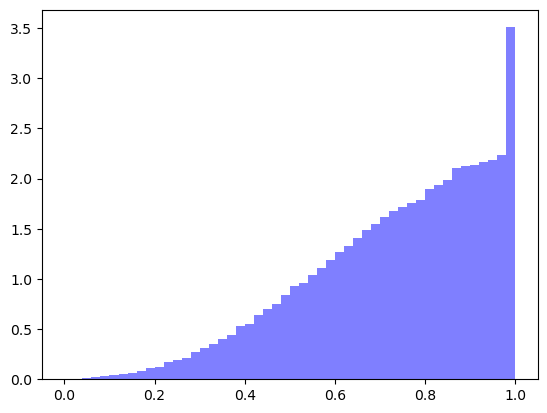

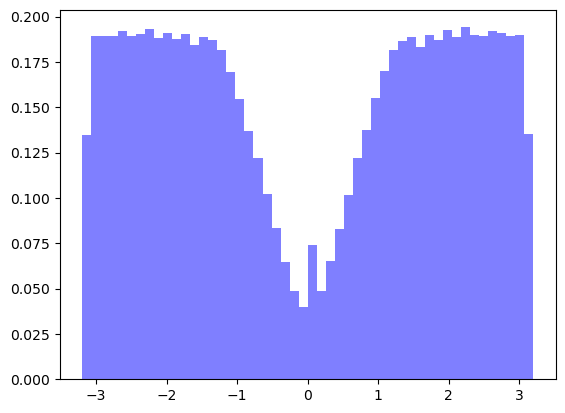

In [7]:
##########################The eigenvalue distribution##########################################
plt.figure(figsize=(6, 6))
plt.scatter(np.real(e1), np.imag(e1), color='blue', alpha=0.2)
plt.title(f"Circular Distribution of Eigenvalues (Ginibre Matrix, size={n}x{n})")
plt.xlabel("Real")
plt.ylabel("Imaginary")
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.show()
########### the heat map complex list plot for the complex spacing ratios######################
# Example data, replace this with your data
x = np.real(e2)
y = np.imag(e2)
# Calculate 2D histogram
heatmap, xedges, yedges = np.histogram2d(x, y, bins=70, density=True)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

# Plot smooth density histogram
plt.imshow(heatmap.T, extent=extent, origin='lower', cmap='viridis')
plt.colorbar(label='Density')
plt.xlabel('Re')
plt.ylabel('Im')
plt.title('Smooth Density Histogram')
plt.show()
#############The radial marginal distribution for the CSR (p(r) vs r)########################
plt.hist(np.abs(e2),range = [0,1],  bins=50, density=True, alpha=0.5, color='blue')
plt.show()
##############The angular marginal distribution for the CSR (p(theta) vs theta)#####################
plt.hist(np.angle(e2),range = [-3.2,3.2],  bins=50, density=True, alpha=0.5, color='blue')
plt.show()

In [ ]:
def CSR_GinUE(n,ens):
    evt = []
    grdt = []
    for i in tqdm(range(ens)):
        #H0 = np.random.normal(0, 1/np.sqrt(2), (n,n))
        # Ginibre matrices with real random gaussian entries with mean = 0, std.dev = 1/sqrt(2)
        H1 = np.random.normal(0, 1/np.sqrt(2), (n,n)) + 1j * np.random.normal(0, 1/np.sqrt(2), (n,n))
        # Ginibre matrices with real complex gaussian entries with mean = 0, std.dev = 1/sqrt(2)
        ev = routine_diag(H1)
        evt.extend(ev)
        csrg = CSR(ev)
        grdt.append(csrg)
    return evt,grdt

In [5]:
def GOE_matrix(dimension): #input(integer) - output(square matrix).
    #1) create a real random matrix from gaussian distribution N(0,1). i.i.d. elements.
    M = np.random.normal(loc=0.0, scale=1.0, size=(dimension,dimension))
    #2) make it symmetric.
    M_transpose = M.T
    GOE_matrix = (M + M_transpose)/2
    return GOE_matrix

In [7]:
def sff_sums(spectrum, times_list):
    """
    This function computes the sum of complex phases involved in the calculation of the 
    spectral form factor. from the spectrum of eigen- or singular 
    values. 
    \in
    spectrum : 1D-array of ordered eigen- or singular values.
    times_list : 1D-array of positive fictitious times.

    \out
    sff_sum_list : 
    """
    sff_sum_list = []
    sff_norm_list = []

    for time in times_list:
        sff_sum = 0

        for value in spectrum:
            sff_sum += cm.exp(-1.j*time*value)
        sff_sum_list.append(sff_sum)
        sff_squared_norm = abs(sff_sum)**2
        sff_norm_list.append(sff_squared_norm)

    sff_sum_list = np.asarray(sff_sum_list) #np.asarray: Converts the input to an array
    sff_norm_list = np.asarray(sff_norm_list)

    return sff_sum_list, sff_norm_list

0


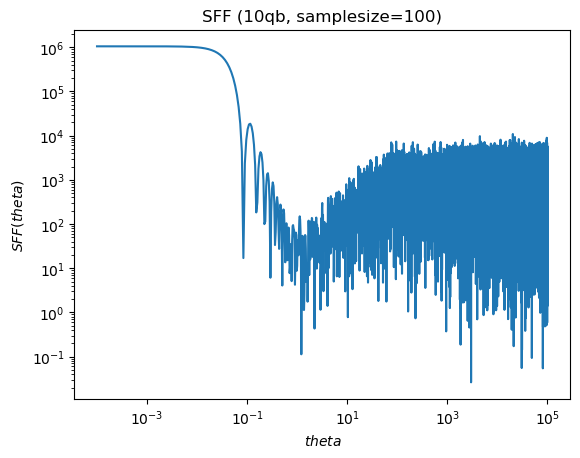

C:\Users\msaha\AppData\Local\Temp\ipykernel_16584\642066977.py:39: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale("log"); plt.xscale("log");


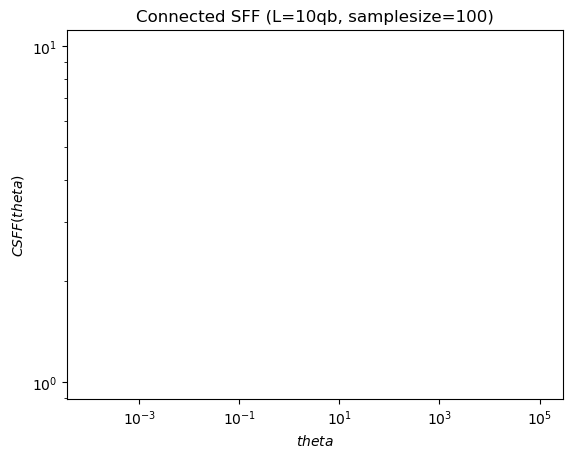

AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [11]:
## CHECK (CONNECTED) SPECTRAL FORM FACTOR with GOE.
L = 10
d = 2**L
theta_list = np.arange(0.01,320,0.01)**2
sample_size = 100
sffnorm_sample_array = []
sffsum_sample_array = []
for i in range(sample_size):
        # Create random Hamiltonian (GOE).
    H_GOE = GOE_matrix(d)
        # Diagonalize it.
    e, v = np.linalg.eigh(H_GOE)
    del H_GOE
        # Compute SFF sums.
    sff_sum_list, sff_norm_list = sff_sums(e, theta_list)
        # Store for later averaging.
    sffsum_sample_array.append(sff_sum_list)  # array in which, for each sample, there is the list of sff sums (one for each value of theta).
    sffnorm_sample_array.append(sff_norm_list) # same for the norm of this sum.
        #
    if i%10==0: print(i)
    
    ## Compute sample averaged SFF:
    sffnorm_sample_array = np.asarray(sffnorm_sample_array)
    sff = sffnorm_sample_array.mean(axis=0)
    ## Compute sample averaged Conn.SFF = Disc. Part + Squared Norm Part :
    sffsum_sample_array = np.asarray(sffsum_sample_array)
    sample_averaged_sffsum = sffsum_sample_array.mean(axis=0)
    sample_averaged_sffsum = np.asarray([abs(av_sffsum)**2 for av_sffsum in sample_averaged_sffsum])
    conn_sff = sff - sample_averaged_sffsum

    ### SFF:
    plt.plot(theta_list, sff)
    plt.yscale("log"); plt.xscale("log");
    plt.xlabel('$theta$'); plt.ylabel('$SFF(theta)$')
    plt.title('SFF ('+str(L)+'qb, samplesize='+str(sample_size)+')')
    plt.show()
    ### Connected SFF:
    plt.plot(theta_list, conn_sff)
    plt.yscale("log"); plt.xscale("log");
    plt.xlabel('$theta$'); plt.ylabel('$CSFF(theta)$')
    plt.title('Connected SFF (L='+str(L)+'qb, samplesize='+str(sample_size)+')')
    plt.show()

In [14]:
def routine_diag(H):
    eigv = nlg.eigvals(H)
    return eigv

In [25]:
def sprat(eigso):
    sratio = (eigso[j+2]-eigso[j+1])/(eigso[j+1]-eigso[j])
    return sratio

In [28]:
def GUE_matrices(n,ens):
    eigenvalues_ensemble = []
    spacing_ratios = []
    for i in range(ens):
    # Generate a random Hermitian matrix
        H0 = np.random.normal(0, 1/np.sqrt(2), (n,n)) + 1j*np.random.normal(0, 1/np.sqrt(2), (n,n))
        G = (H0 + H0.conj().T) / 2  # Make it Hermitian
        # Calculate the eigenvalues
        eigvs = routine_diag(G)
        eigso = np.sort(eigvs) #sort the eigenvalues
        # Append the eigenvalues to the ensemble
        eigenvalues_ensemble.append(eigvs) 
        for j in range(len(eigvs)-2):
        #spacings = np.diff(eigs)
            sratio = (eigso[j+2]-eigso[j+1])/(eigso[j+1]-eigso[j])
            spacing_ratios.append(sratio)
    return eigenvalues_ensemble, spacing_ratios

n = 1000  # Matrix size
ens = 50  # Number of random matrices

eigv,SR = GUE_matrices(n,ens)

In [20]:
e1 = np.array(eigv).flatten()
e2 = np.array(SR).flatten()

C:\Users\msaha\anaconda3\envs\ayana_quspin\lib\site-packages\numpy\lib\histograms.py:839: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
C:\Users\msaha\anaconda3\envs\ayana_quspin\lib\site-packages\numpy\lib\histograms.py:882: ComplexWarning: Casting complex values to real discards the imaginary part
  db = np.array(np.diff(bin_edges), float)
C:\Users\msaha\anaconda3\envs\ayana_quspin\lib\site-packages\matplotlib\axes\_axes.py:6793: ComplexWarning: Casting complex values to real discards the imaginary part
  bins = np.array(bins, float)  # causes problems if float16


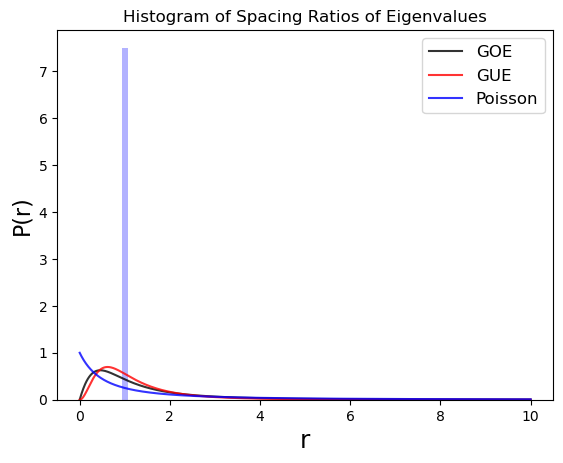

In [21]:
##############Formulas of spacing ratios###################################
x = np.linspace(0, 10, 1000)
prgoe = 27*x*(x+1)/(8*(x** 2 + x + 1)**(5/2)) 
prgue = 81*np.sqrt(3)*x**2*(x+1)**2/(4*np.pi*(x ** 2 + x + 1)**(4)) 
prpoi = 1/(x+1)**2
#########################################################################
plt.hist(e2,range = [0,8],  bins=60,density=True, alpha=0.3, color='blue')
#plt.hist(es,range = [0,8],  bins=40,density=True, alpha=0.3, color='orange')
plt.plot(x,prgoe,alpha=0.8, color='black')
plt.plot(x,prgue,alpha=0.8, color='red')
plt.plot(x,prpoi,alpha=0.8, color='blue')
plt.xlabel('r', fontsize = 18)
plt.ylabel('P(r)', fontsize = 16)
plt.title('Histogram of Spacing Ratios of Eigenvalues')
# Function add a legend  
plt.legend(["GOE", "GUE", "Poisson"], loc ="upper right", fontsize = 12)
plt.grid(False)
plt.savefig('GOE-sprat-clustertrailN1000.pdf')

########################################################################